In [70]:
from torchvision.transforms import v2
from torchvision import transforms
import torch
import torch.nn as nn
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision.transforms import v2


import matplotlib.pyplot as plt


#### 모델 학습<hr>
- 사용할 모델: inceptionV3 

In [ ]:
# 이미지 돌려서 저장 또는 잘라서 저장



## 데이터 변형 및 전처리
transConvert = v2.Compose([
    # 거의 비슷한 사진을 최소화하기 위한 전처리
    transforms.RandomApply([ transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomAdjustSharpness(0)], p=0.8),
    transforms.ToTensor(),
    # 모델 적용을 위한 전처리
    v2.Resize(size=(342), interpolation=v2.InterpolationMode.BILINEAR),
    v2.CenterCrop(299),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# 이미지 돌려서 저장 또는 잘라서 저장



## 데이터 변형 및 전처리v2
transConvert = v2.Compose([
    transforms.ToTensor(),
    transforms.RandomApply([ transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomAdjustSharpness(0),
    ],p=0.85),
    # transforms.ToTensor(),
    v2.Resize(size=(342), interpolation=v2.InterpolationMode.BILINEAR),
    v2.CenterCrop(299),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [73]:
## 데이터 관련 변수
DATA_DIR=r'C:\Users\KDP-25\Desktop\OVERWATCH'
imgDS=ImageFolder(root=DATA_DIR, transform=transConvert)

In [74]:
print(f'imgDS.classes       : {imgDS.classes}')
print(f'imgDS.class_to_idx  : {imgDS.class_to_idx}')
print(f'imgDS.targets       : {imgDS.targets}')
for img in imgDS.imgs:
    print(f'imgDS.imgs       : {img}')
    break

imgDS.classes       : ['Diva', 'Genji', 'Hanzo', 'Para', 'Roadhog', 'Tracer']
imgDS.class_to_idx  : {'Diva': 0, 'Genji': 1, 'Hanzo': 2, 'Para': 3, 'Roadhog': 4, 'Tracer': 5}
imgDS.targets       : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


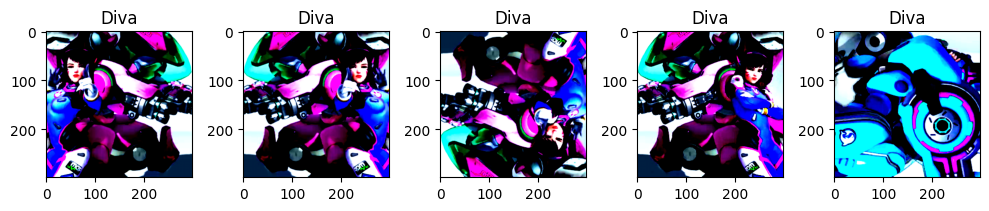

In [75]:
LABEL_NAMES = imgDS.classes

# 3개 데이터와 타겟 로딩
fig, axes=plt.subplots(1,5, figsize=(10, 4))
for idx, (img_data, target) in enumerate(imgDS) :
    axes[idx].imshow(img_data.permute(1,2,0))
    axes[idx].set_title(LABEL_NAMES[target])
    if idx >=4: break
plt.tight_layout()
plt.show()

In [ ]:
def makeFolder(data_dir, size):
    ## 데이터 관련 변수
    DATA_DIR=data_dir

    ## 데이터 변형 및 전처리==> 사용할 모델==inceptionV3
    transConvert = v2.Compose([
        transforms.RandomApply([ transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomAdjustSharpness(0)], p=0.8),
        v2.Resize(size=size),
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True)
    ])
    imgDS=ImageFolder(root=DATA_DIR, transform=transConvert)
    return imgDS

In [16]:
from torchvision.models import inception_v3, Inception_V3_Weights
from sklearn.model_selection import train_test_split 
from torch.utils.data import DataLoader, Dataset, random_split

In [17]:
# 모델 설계

model= inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1)
model.parameters

<bound method Module.parameters of Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2

In [18]:
# FC 층 수정
h_layers=nn.ModuleList()
hidden=[1500, 1000, 800, 500]
for h in range(len(hidden)-1):
            h_layers.append(nn.Linear(hidden[h], hidden[h+1]))

model.fc=nn.Sequential(
    nn.Linear(in_features=2048, out_features=1000),
    nn.Linear(in_features=1000, out_features=500),
    nn.Linear(500, 6)
)

In [19]:
# 사전학습 모델 파라미터 비활성화 
for named, param in model.named_parameters():
    print(f'[{named}] - {param.shape}')
    # 역전파 시에 업데이트 되지 않도록 설정
    param.requires_grad=False
# 전결합층 모델 파라미터 활성화
for param in model.fc.parameters():
    param.requires_grad=True

[Conv2d_1a_3x3.conv.weight] - torch.Size([32, 3, 3, 3])
[Conv2d_1a_3x3.bn.weight] - torch.Size([32])
[Conv2d_1a_3x3.bn.bias] - torch.Size([32])
[Conv2d_2a_3x3.conv.weight] - torch.Size([32, 32, 3, 3])
[Conv2d_2a_3x3.bn.weight] - torch.Size([32])
[Conv2d_2a_3x3.bn.bias] - torch.Size([32])
[Conv2d_2b_3x3.conv.weight] - torch.Size([64, 32, 3, 3])
[Conv2d_2b_3x3.bn.weight] - torch.Size([64])
[Conv2d_2b_3x3.bn.bias] - torch.Size([64])
[Conv2d_3b_1x1.conv.weight] - torch.Size([80, 64, 1, 1])
[Conv2d_3b_1x1.bn.weight] - torch.Size([80])
[Conv2d_3b_1x1.bn.bias] - torch.Size([80])
[Conv2d_4a_3x3.conv.weight] - torch.Size([192, 80, 3, 3])
[Conv2d_4a_3x3.bn.weight] - torch.Size([192])
[Conv2d_4a_3x3.bn.bias] - torch.Size([192])
[Mixed_5b.branch1x1.conv.weight] - torch.Size([64, 192, 1, 1])
[Mixed_5b.branch1x1.bn.weight] - torch.Size([64])
[Mixed_5b.branch1x1.bn.bias] - torch.Size([64])
[Mixed_5b.branch5x5_1.conv.weight] - torch.Size([48, 192, 1, 1])
[Mixed_5b.branch5x5_1.bn.weight] - torch.Size([

In [20]:
print(len(imgDS), sum([66211, 15663]))

82764 81874


In [21]:
# 데이터 분리-> test O
train_size = int(0.8 * len(imgDS))  # 80%
val_size = 82764- train_size

print(train_size, val_size)
train_dataset, val_dataset = random_split(imgDS, [train_size, val_size])


# 데이터 로더 생성
trainDL=DataLoader(train_dataset, batch_size=100)
testDL=DataLoader(val_dataset, batch_size=100)


66211 16553


In [22]:
# 데이터 로더 테스트
for f, t in trainDL:
    print(f.shape, t.shape)
    break

torch.Size([100, 3, 299, 299]) torch.Size([100])


In [24]:
from get_train_model import model_training
import torch.nn.functional as F
import torch.optim as optim
import os

In [ ]:
EPOCH=100
LR=0.001
optimizer= optim.Adam(model.parameters(), lr=LR)
SAVE_PATH='./model'
SAVE_FILE='overwatch_all.pth'

In [26]:
# 폴더 존재 여부 확인 및 생성
if not os.path.exists('./model'):
    os.mkdir('./model')

In [27]:
# inception모델에 데이터를 넣었을때 어떻게 되는가?
# 2가지 데이터가 나옴 -> 0번 선택
for f, t in trainDL:
    pre_y=model(f)
    pre_y=pre_y[0]
    break


In [28]:
model.parameters

<bound method Module.parameters of Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2

In [140]:
# 학습 설계
LOSS_HISTORY, SCORE_HISTORY= model_training(model=model, trainDL=trainDL, testDL=testDL,
               optimizer=optimizer,LIMIT=15, break_param='score',
               type='muticlass', optim_type='score', SAVE_PATH=SAVE_PATH,
               SAVE_FILE='overwatch_all.pth', save_type='all',
               numcls=6, epoch=EPOCH)

1/100


KeyboardInterrupt: 